# Multivariate Linear Regression
The dataset has the squared meters of the house and the number of bathrooms, while the third column represents the price of the houses.
The problem here is the different scale of the features. The problem can be solved by **feature scaling**.

## Load data

In [1]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('data/ex1data2.txt', delimiter=',')

print(data.shape)

(47, 3)


In [2]:
x = data[:, :2]
y = data[:, -1]

# from n-dimensional vector to m x 1 matrix
y = np.reshape(y, (y.shape[0], 1))

m = x.shape[0]
print("Training examples: {}".format(m))

n = x.shape[1]
print("Features: {}".format(n))

print("10 examples: \n", x[:10, :])

Training examples: 47
Features: 2
10 examples: 
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]


## Features normalization
The **feature normalization** is necessary because the features have not the same order of magnitude. This is a bad thing as our classifiers will give more weight to the larger features instead of treating all of them equally. This phase will help removing this problem by reducing the differences in the order of magnitude while keeping the same informations on the feature being normalized. Using this technique, it is possible to speed up the gradient descent algorithm as it will go towards the minimum in an optimal way.

From all the features, the normalization can be done in two steps:
1. Subtract the mean value
2. Didive by the standard deviation

In [3]:
def feature_normalize(x):
    x_norm = x
    
    mu = np.zeros((1, x.shape[1]))
    sigma = np.zeros((1, x.shape[1]))
    
    mu = np.mean(x, axis = 0) # mean value
    sigma = np.std(x, axis = 0) # std deviation value
    
    for i in range(x.shape[1]):
        x_norm[:,i] = (x[:,i] - mu[i])/sigma[i]
        
    return x_norm, mu, sigma

In [4]:
x_norm, mu, sigma = feature_normalize(x)
print("10 normalized examples: \n", x_norm[:10, :])
print("Mean value: {}".format(mu))
print("Standard deviation value: {}".format(sigma))

10 normalized examples: 
 [[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]
 [-0.01994505  1.10220517]
 [-0.59358852 -0.22609337]
 [-0.72968575 -0.22609337]
 [-0.78946678 -0.22609337]
 [-0.64446599 -0.22609337]]
Mean value: [2000.68085106    3.17021277]
Standard deviation value: [7.86202619e+02 7.52842809e-01]


The chosen hypothesis function is as follow:
$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$
We need to add a new column of 1 to the dataset in order to deal with the $\theta_0$ parameter.

In [5]:
x_norm = np.concatenate([np.ones((m,1)), x_norm], axis = 1)

print("The shape of the dataset is {}".format(x_norm.shape))

The shape of the dataset is (47, 3)


Let's now introduce the function to perform the gradient descent of the cost function and that will help us calculate the cost on the training set:

In [6]:
def gradient_descent(x, y, theta, alpha = 0.1, iterations = 1500):
    costs = []
    for i in range(0, iterations):
        theta = theta - (alpha / x.shape[0]) * (x.T).dot(x.dot(theta) - y)
        costs.append(calculate_cost(x, y, theta))
    return theta, costs

def calculate_cost(x, y, theta = [[0],[0],[0]]):
    h = x.dot(theta)
    return 1/(2 * x.shape[0]) * np.sum(np.square(h - y))

Let's run the gradient descent using as the learning rate $\alpha$ a value of 0.1 and running 1500 iterations:

In [7]:
alpha = 0.1
num_iters = 1500

theta = np.zeros((3, 1))
theta, cost_history = gradient_descent(x_norm, y, theta, alpha, num_iters)

theta_no_norm = np.zeros((3, 1))
x = np.concatenate([np.ones((m,1)), x], axis = 1)
theta_no_norm, cost_history_no_norm = gradient_descent(x, y, 
                                        theta_no_norm, alpha, num_iters)

print("Non normalized theta:\n {}\n\n".format(theta_no_norm))
print("Normalized theta:\n {}\n\n".format(theta))

Non normalized theta:
 [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Normalized theta:
 [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]




Let's plot the cost function of the costs calculate on the normalized and non-normalized datasets:

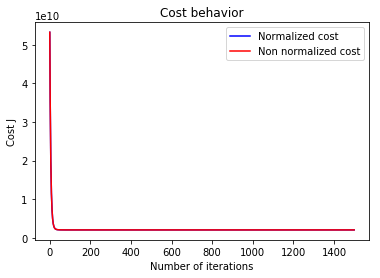

In [8]:
# Plot the convergence graph
plt.plot([i for i in range(num_iters)], 
         cost_history, '-b', label = 'Normalized cost')
plt.plot([i for i in range(num_iters)], 
         cost_history_no_norm, '-r', label = 'Non normalized cost')
plt.xlabel('Number of iterations') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label 
plt.title('Cost behavior')
plt.legend()
plt.show()

In the graph above the functions overlaps. It's for this reason that we can see only the red curve. 
## Normal equations
We can take the same results in only one calculation and without any feature scaling. This can be done by using a closed form solution, but it can be used only for smaller dataset without a huge number of features. For big dataset, it is mandatory to use the **Batch Gradient Descent** or the **Stochastic Gradient Descent**.   
The normal equation is:
$$ \theta = (X^{T}X)^{-1}X^Ty $$
The reason why we cannot use this form for dataset with a lot of features, is that we need to calculate the inverse of the matrix $X^tX$, which can be very resource consuming and can bring a lot of problems when the matrix is a singular one (we can partially solve this problem by using the *pseudo-inverse* of the matrix.
Let's implement the equation:

In [9]:
def normal_equations(x, y):
    return np.linalg.pinv(x.T.dot(x)).dot(x.T).dot(y)

Let's use it on our dataset:

In [10]:
normal_theta = normal_equations(x, y);
print(normal_theta)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


We can see that the $\theta$ value calculated using the normal equation is the same as the one calculated with the gradient descent, even if here we haven't chosen a learning parameter $\alpha$ e we did not do any feature scaling. These two are the strong point for the technique of the normal equations.

## Let's make some predictions
We want to estimate the price for a 1650 squared meters house having 3 bedrooms:

In [11]:
# Let's create the array x (the features used for prediction)
for_prediction = np.array([1650, 3])
# Let's use the values of the average value and
# standard deviation to do feature scaling
for_prediction = np.array([1, 
                           (for_prediction[0] - mu[0])/sigma[0], 
                           (for_prediction[1] - mu[1])/sigma[1]])
# Let's add a the second dimensions
for_prediction = for_prediction.reshape((for_prediction.shape[0], 1))

# Let's predict the cost using the hypothesis values
predicted_cost = theta.T.dot(for_prediction)
print('Predicted cost for a 1650 squared meters and 3 bedrooms house: {}'
      .format(predicted_cost))

Predicted cost for a 1650 squared meters and 3 bedrooms house: [[293081.4643349]]


## Learning rate values
During the training phase, we use the gradient descent algorithm, which depends on a parameter, the **learning rate**.

The possible scenarios are:
1. If a very *little* value for the learning rate is used, the time needed to the gradient descent to converge will be longer;
2. If we use a *big* value for the learning rate, we can end up overshooting the global (or local) minimum. Eventually we can end up diverging.

There is no known way to set the learning rate to an optimal value, it's for this reason that it is necessary to try different values for $\alpha$ and keep the one which works better.

Let's see the differences when using different type of learning rates.
### Small learning rate
Here we will use a very small learning rate, which will be set to $10^{-4}$ and we will do $10^4$ iterations:

In [12]:
alpha = 0.0001
num_iters = 10000

theta_little = np.zeros((3, 1))
theta_little, cost_history_little = gradient_descent(x_norm, y, 
                                        theta_little, alpha, num_iters)

print("Theta using a learning rate of 1e-4: \n{}".format(theta_little))

Theta using a learning rate of 1e-4: 
[[215188.10240439]
 [ 61279.52044616]
 [ 19975.26231463]]


Let's plot the cost function with respect to the number of iterations: 

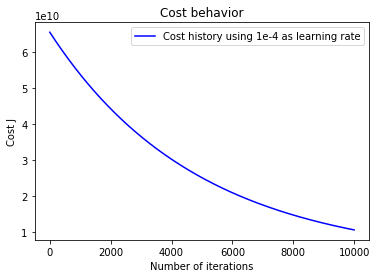

In [13]:
# Plot the convergence graph
plt.plot([i for i in range(num_iters)], 
         cost_history_little, '-b', 
         label = 'Cost history using 1e-4 as learning rate')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Cost behavior')
plt.legend()
plt.show()

As it can be seen in the graph, using a small learning rate ($\alpha = 10^{-4}$) slows down the learning phase.

Using such a small learning rate prevents our algorithm from converging to the optimal minimum in 10000 iterations, even if it can be reached in less than 50 iterations as before (using $\alpha=0.1$). 

### Big learning rate
We'll now see the effects of using a big learning rate. We will set it to a value of 2 and we will use only 10 iterations:

In [14]:
alpha = 2
num_iters = 10
theta_big = np.zeros((3, 1))
theta_big, cost_history_big = gradient_descent(x_norm, y, 
                                    theta_big, alpha, num_iters)

print("Theta using a learning rate of 1: \n{}".format(theta_big))

Theta using a learning rate of 1: 
[[-4.38885763e-08]
 [-9.41838069e+07]
 [-9.42998330e+07]]


Let's now plot the graph as we did before:

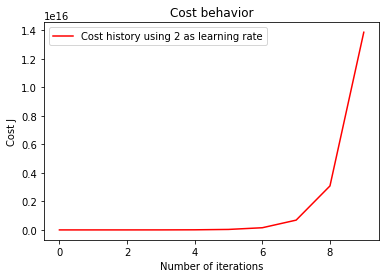

In [15]:
# Plot the convergence graph
plt.plot([i for i in range(num_iters)], 
         cost_history_big, '-r', 
         label = 'Cost history using 2 as learning rate')
plt.xlabel('Number of iterations') 
plt.ylabel('Cost J')
plt.title('Cost behavior')
plt.legend()
plt.show()

The opposite event occurs when we choose the learning rate to be very big (in this case it is $2$). In this case the algorithm will not only overshoot the minimum, but it will diverge completely. This can be seen in the graph, because **the cost increases as the number of iterations increases**. 

### Using a different initial condition
An other thing that can modify the algorithm's convergence is the choice of the starting point given to the *gradient descent* algorithm. This happens for the nature of the algorithm, as it look for the descending direction of the gradient and goes into that direction. 

Let's try to use, as the initial condition, the values 1, 2 and 3 for the values $\theta_0$, $\theta_1$ and $\theta_3$:

In [16]:
alpha = .01
num_iters = 1000
theta = np.array([1, 2, 3]).reshape((3,1))
theta, cost_history = gradient_descent(x_norm, y,
                                theta, alpha, num_iters)

print("Theta using a learning rate of 1: \n{}"
      .format(theta_big))

Theta using a learning rate of 1: 
[[-4.38885763e-08]
 [-9.41838069e+07]
 [-9.42998330e+07]]


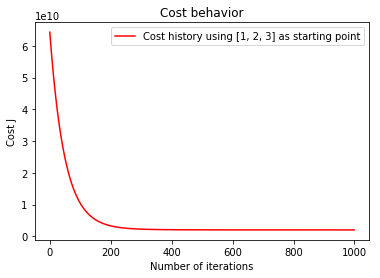

In [17]:
# Plot the convergence graph
plt.plot([i for i in range(num_iters)], 
         cost_history, '-r', 
         label = 'Cost history using [1, 2, 3] as starting point')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Cost behavior')
plt.legend()
plt.show()

In this case the convergence isn't affected from the choice of the starting point as our function to be optimized is a **bowl shaped** function, which means that it has only a local minimun and it is the global one.

Different things could happen when the function to be optimized has different local and global minima, because it can happen that if we choose a starting point near to a local minimum, then it will be the one which will be reached, not the global one.

To mitigate this problem, it is usually usefull to run the *gradient descent* algorithm using different choices of the starting point. After all of these runs, **the parameter with the smallest error attached will be chosen as the optimal one**.